## Task 3: Exploratory Data Analysis - Retail
**Problem Statement: Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ This task is about Exploratory Data Analysis - Retail where the task focuses on a business manager who will try to find out weak areas where he can work to make more profit.**

## Author : Diwakar Sah

### Impoting all the necessary modules and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset 

In [3]:
data = pd.read_csv('SampleSuperstore.csv')

In [4]:
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [5]:
data.shape

(9994, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Checking for any null values in the dataset

In [8]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

#### Checking if there are any duplicate values 

In [10]:
data.duplicated().sum()

17

#### Removing the duplicate values, keeping only the first one.

In [11]:
data.drop_duplicates(subset=None, keep='first', inplace=True)
data.duplicated().sum()

0

In [12]:
data = data.drop(['Postal Code'], axis = 1)  #Dropping the Postal Code column as it not going to be used for analysis.

### Creating a heat map to visualize the correlation between the different columns

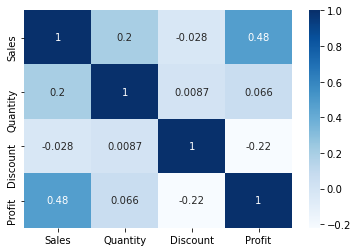

In [13]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='Blues')

### Creating pair plot to visualize that how are different columns related to each other.

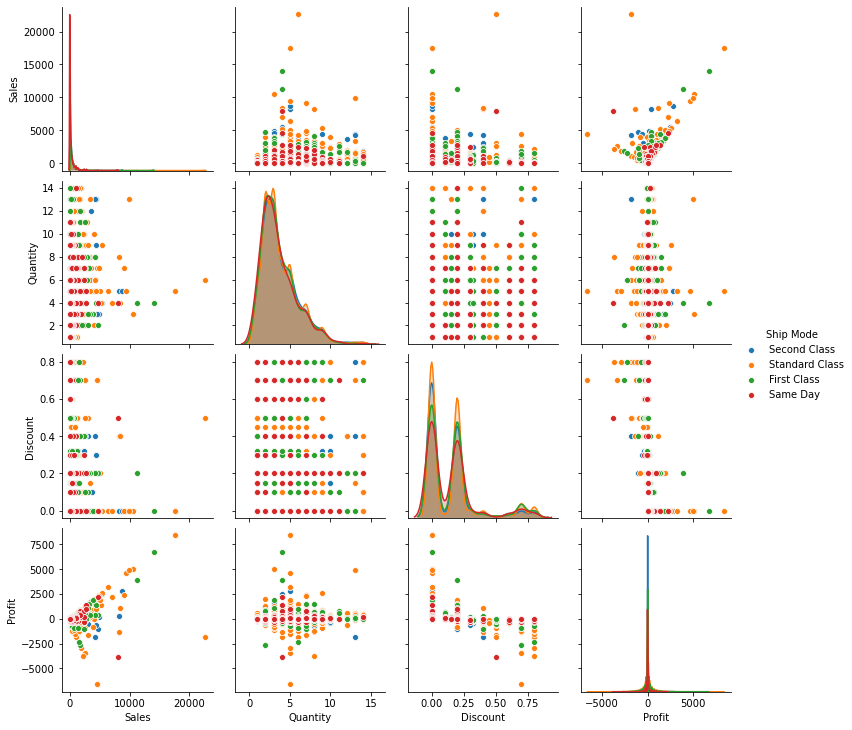

In [14]:
sns.pairplot(data, hue='Ship Mode')

In [15]:
data['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

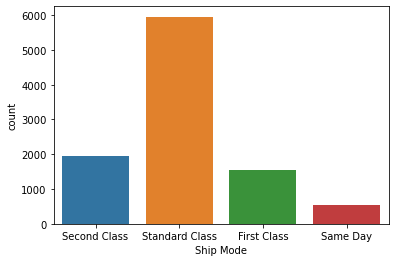

In [16]:
sns.countplot(x = data['Ship Mode'])

### It can easily be visualized that Standard Class is the most common mode of Shipping.

In [17]:
data['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

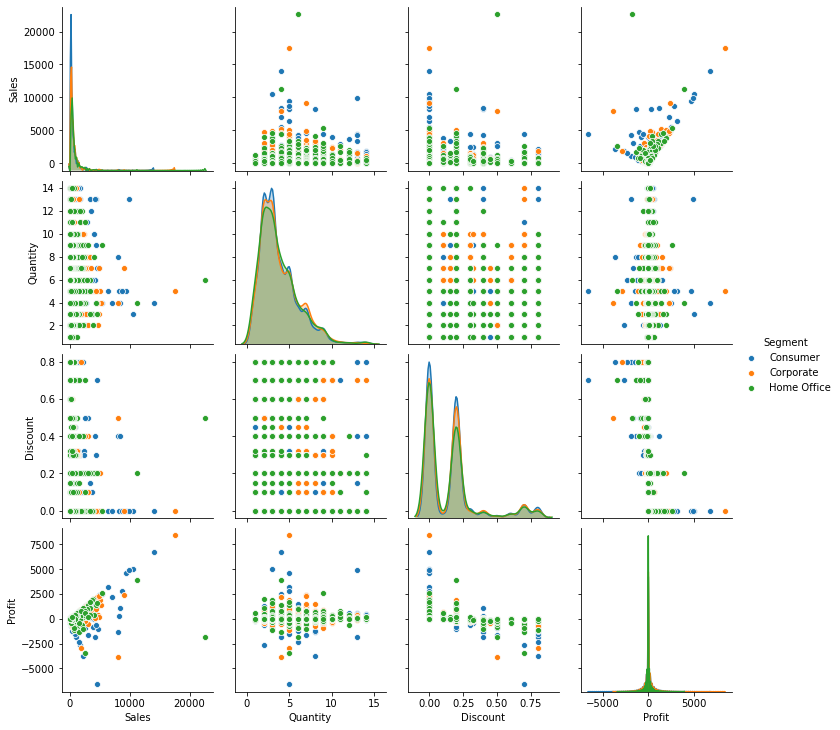

In [39]:
sns.pairplot(data, hue = 'Segment')

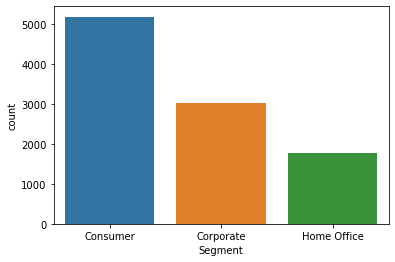

In [18]:
sns.countplot(x = data['Segment'])

### Thus it can be easily concluded that Consumer are the most common segment.

In [19]:
data['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

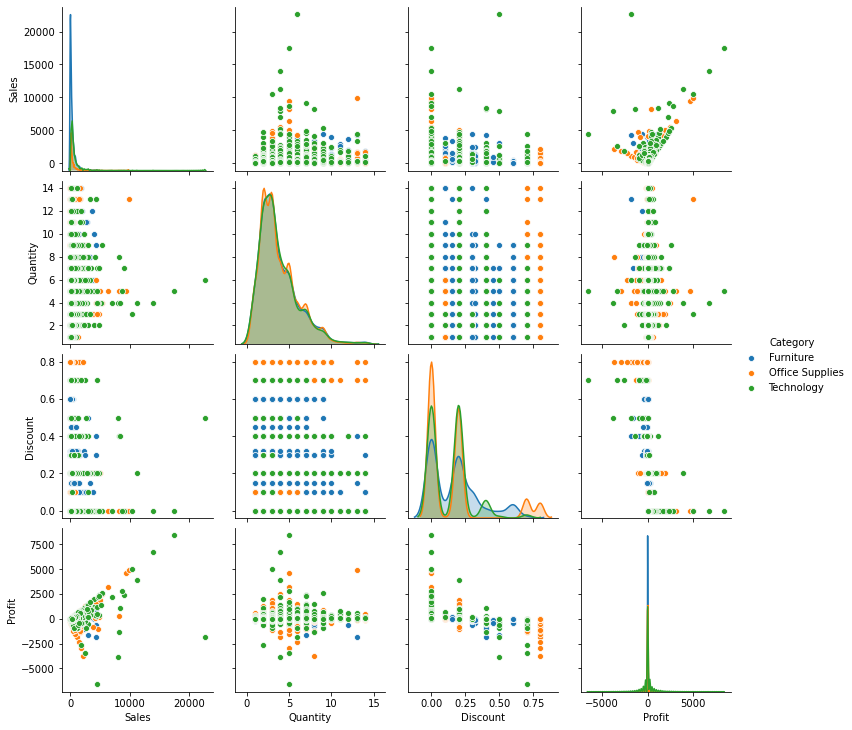

In [41]:
sns.pairplot(data, hue = 'Category')

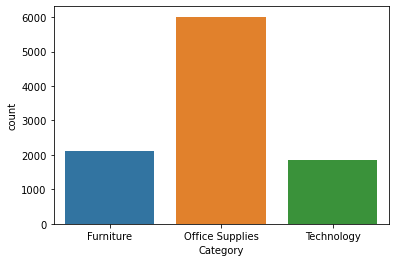

In [20]:
sns.countplot(x = data['Category'])

### Thus, It can be concluded that Office Supplies Catgory is the most common Category.

In [21]:
data['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

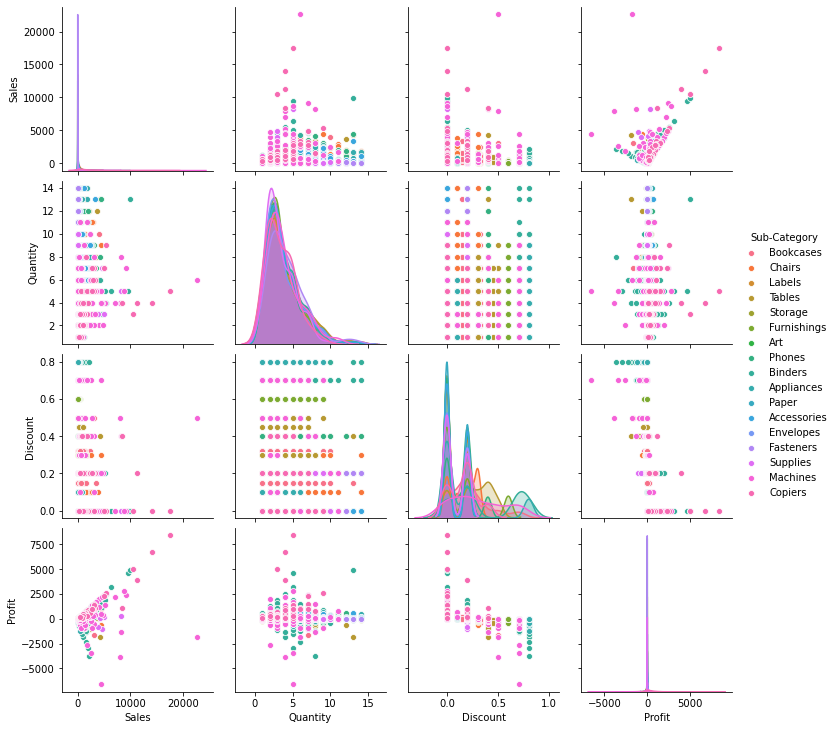

In [15]:
sns.pairplot(data, hue = 'Sub-Category')

<function matplotlib.pyplot.show(*args, **kw)>

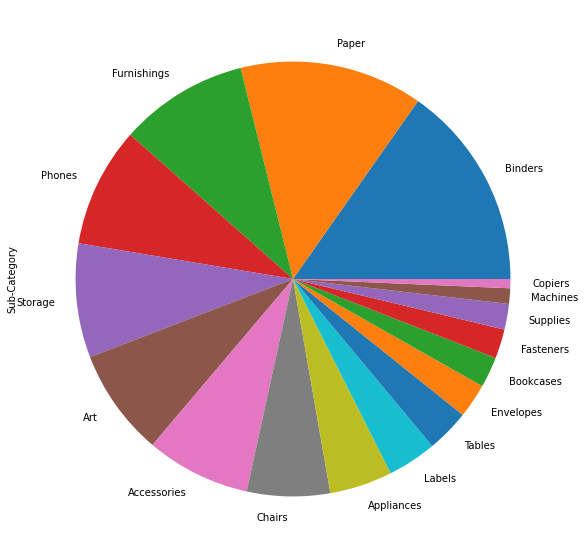

In [22]:
plt.figure(figsize = (12,10))
data['Sub-Category'].value_counts().plot.pie()
plt.show

### Maximum sales are of Binders, Paper, furnishings, Phones, storage, art, accessories and minimum from copiers, machines, suppliers

In [23]:
data['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

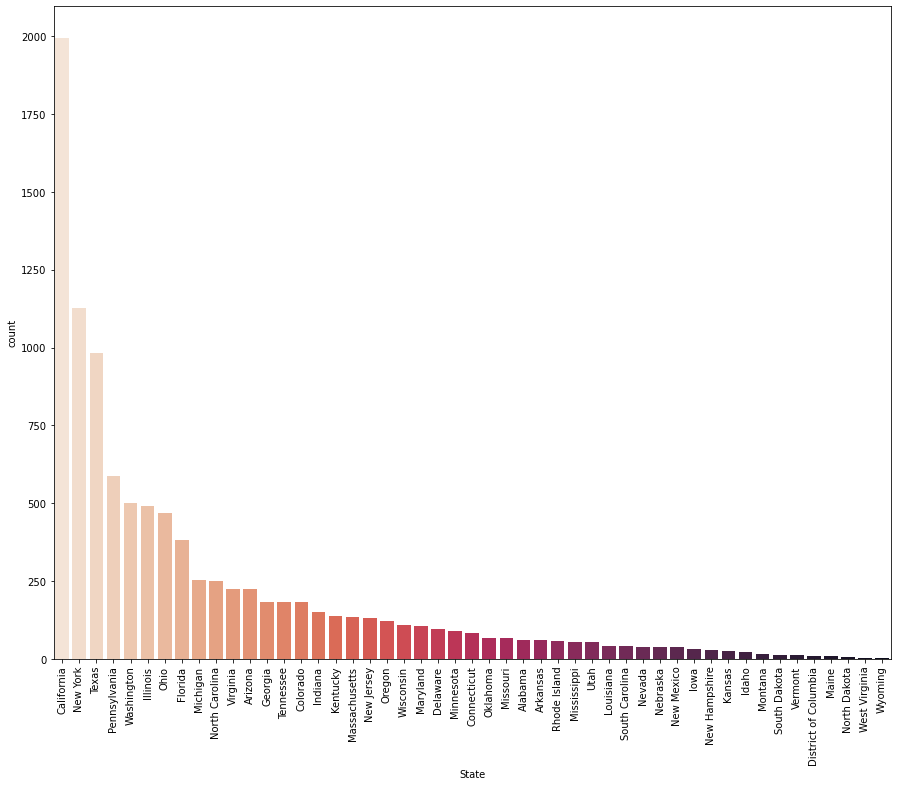

In [24]:
plt.figure(figsize = (15,12))
sns.countplot(x='State', data = data, palette='rocket_r', order=data['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

### Thus, we can conclude that the highest number of buyers are from California, New York and Texas.

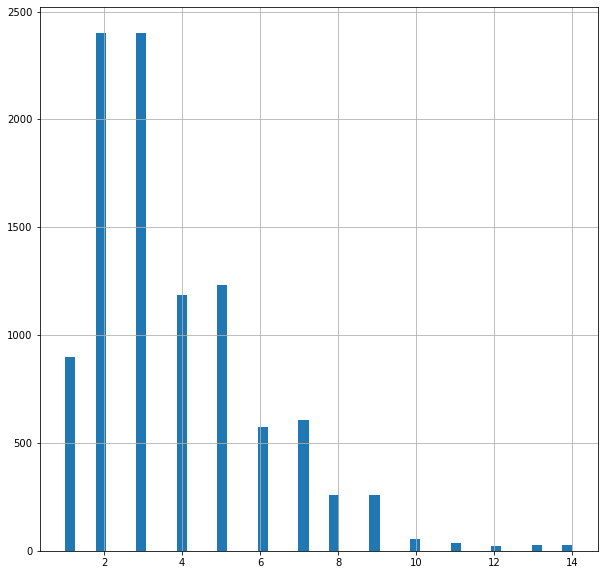

In [25]:
data['Quantity'].hist(figsize=(10,10), bins = 50)
plt.show()

### Most of the Customers tend to buy Quantity of 2 or 3.

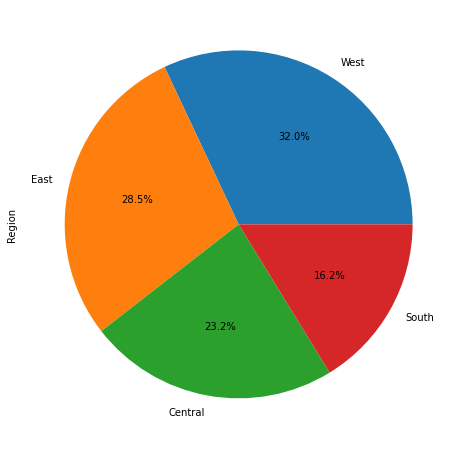

In [26]:
plt.figure(figsize=(10,8))
data['Region'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

### Highest number of sales are in western region

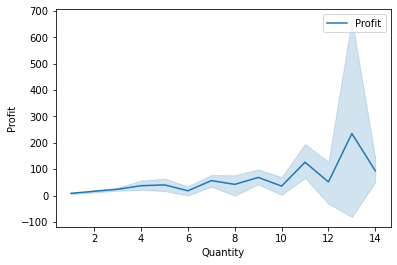

In [27]:
sns.lineplot(y='Profit', x='Quantity', label='Profit', data=data)
plt.legend()
plt.show()

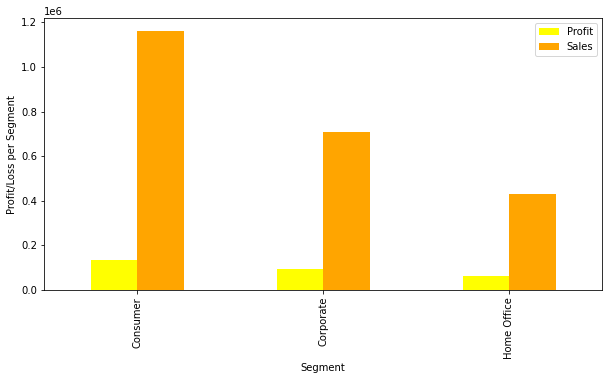

In [28]:
data.groupby('Segment')[['Profit', 'Sales']].sum().plot.bar(color=['yellow', 'orange'], figsize=(10,5))
plt.ylabel("Profit/Loss per Segment")
plt.show()

### The Consumer segment gives the highest amount of Profit, with highest number of sales.

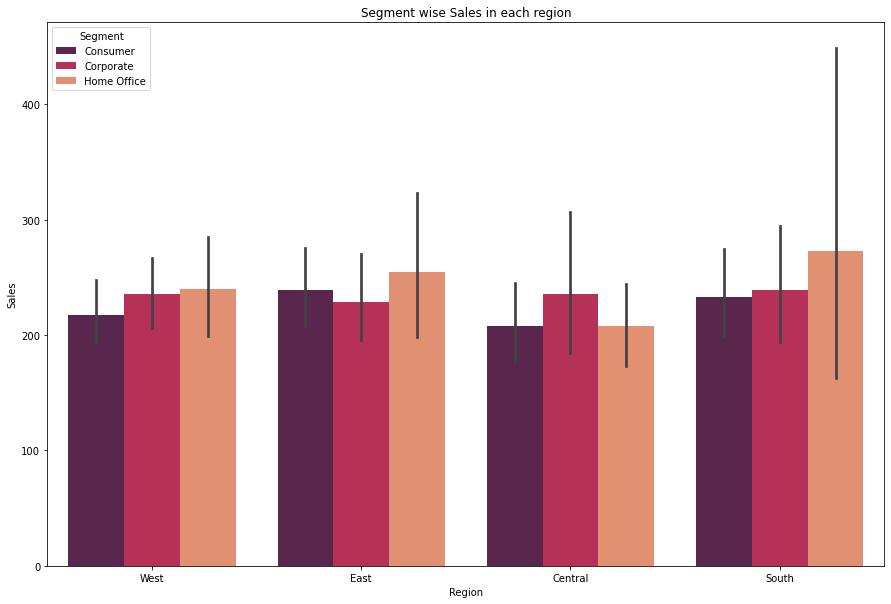

In [29]:
plt.figure(figsize = (15,10))
plt.title("Segment wise Sales in each region")
sns.barplot(x='Region', y='Sales', data=data, hue='Segment', order=data['Region'].value_counts().index, palette='rocket')
plt.show()

### Segment wise Sales are almost same in every region

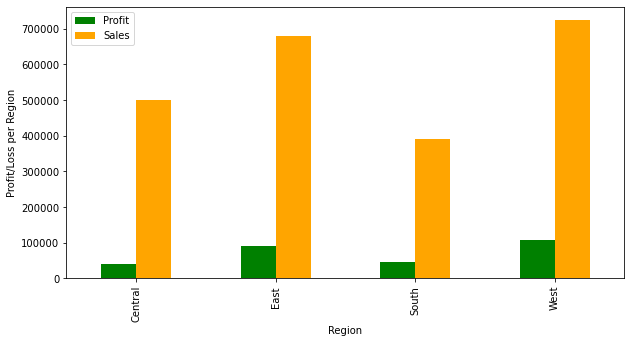

In [30]:
data.groupby('Region')[['Profit', 'Sales']].sum().plot.bar(color=['green', 'orange'], figsize=(10,5))
plt.ylabel("Profit/Loss per Region")
plt.show()

### Western Region gives highest amount of Profit, with highest amount of sales. 

### Lowest amount of Sales are from the Southern region.

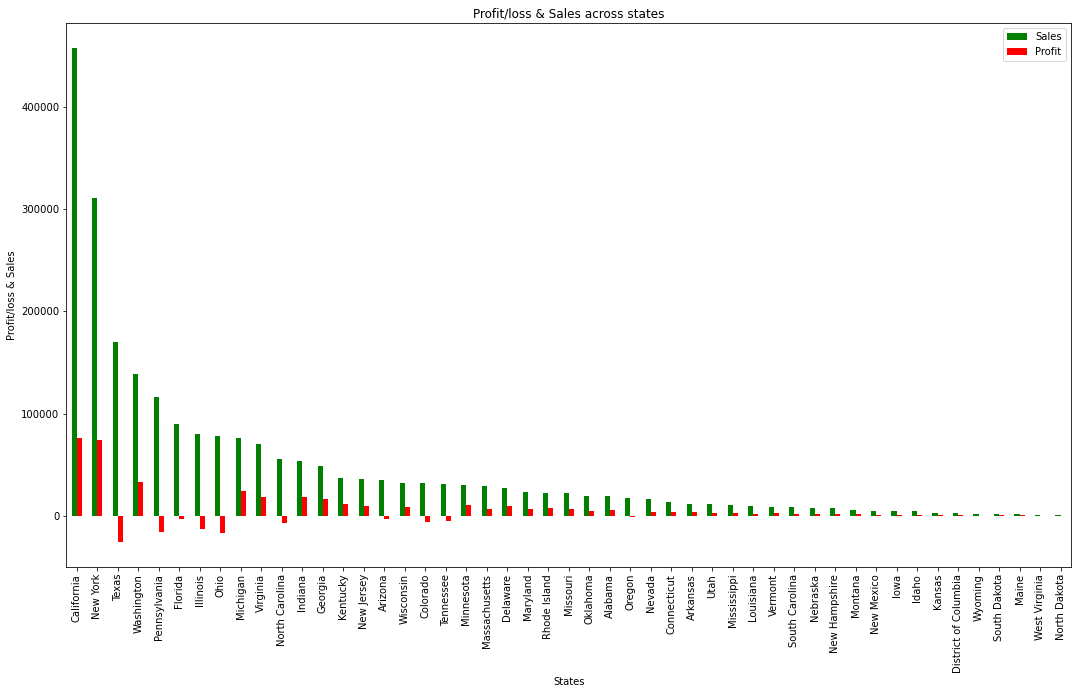

In [31]:
ps = data.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['green','red'],figsize=(18,10))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()

### Cities like California, New York provide high pofit.

### Cities like Texas,Pennsylvania, Ohio provide high amount of losses.

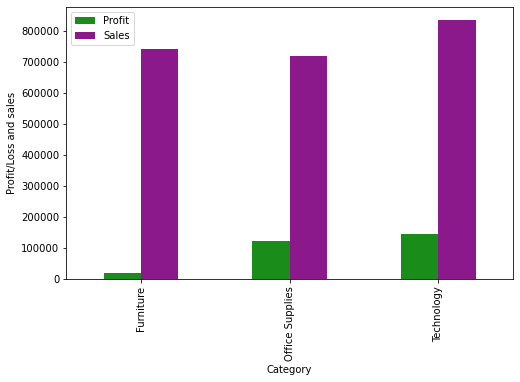

In [32]:
data.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['green','purple'],alpha=0.9,figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

**As a business manager, try to find out the weak areas where you can work to make more profit?**

### Sales to Office Supplies and Technology provide high Profit.

### Sales of furnitute provide less Profit.

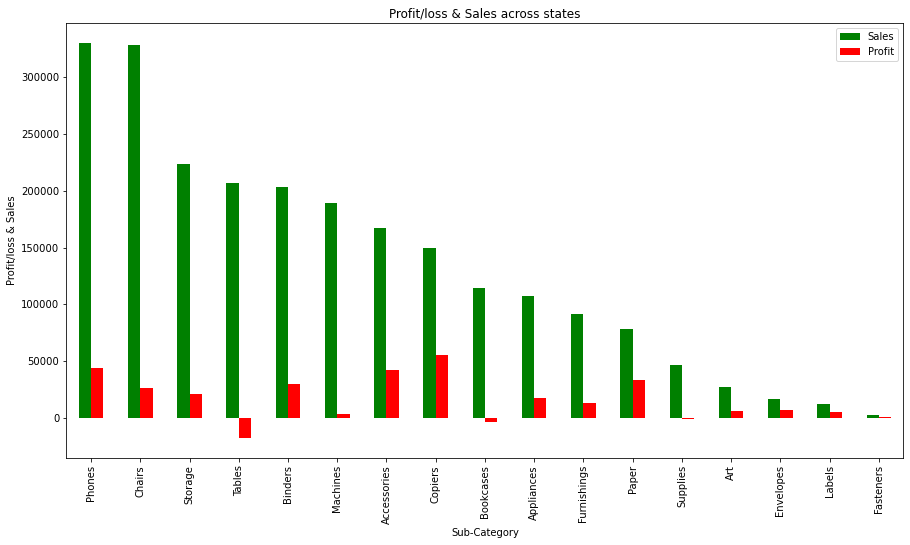

In [33]:
ps = data.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['green','red'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss & Sales')
plt.show()

### Phones have a high amount of Sales and providing Maximum profit.

### Chairs have a high amount of Sales but they provide less amount of profit compared to Phones.

### Tables, bookcases have an average amount of sales but are providing in huge losses. 

### Fasteners have the lowest amount of Sales.

### Sub- Categories like Art, Envelopes, Labels, Fasteners are to be looked upon with urgency as their amount of Sales might be a reason to worry about. 